In [ ]:
# Scikit-learn syntax
from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)

**Classifying labels of unseen data**
1. Build a model
2. Model learns from the labeled data we pass it
3. Pass unlabeled data to the the model as input
4. Model predicts the labels of unseen data

**Label Data = Training Data**


# **k-Nearest Neighbors**
- Predict the label of a data point by
  - Looking at the k closest labeled data points
  - Taking a majority vote

In [ ]:
# Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

preditions = knn.predict(X_new)

1. Split the data in test and training set.
2. Fit/Train classifier on training set.
3. Calculate accuracy using test set

In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Print the accuracy of the model
print(knn.score(X_test, y_test))

**Model Complexity**
- Larger k = less complex model = can cause underfitting
- Smaller k = more complex model = can lead to overfitting

# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# R-squared in scikit-learn
print(reg.score(X_test, y_test))

# RMSE(Root Mean Squared Error) in scikit-learn
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))

# **Cross Validation**

Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.

The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on new, unseen data.

- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computatinlally expensive

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

**Regularization**
- Linear Regression minimizes a loss function
- It chooses a coefficient 'a' for each feature variable, plus b
- Large coefficients can lead to overfitting
- Regularization: Penalize large coefficents

In [ ]:
# Ridge Regression

# a is numpy vector -> e.g: [1,2, 3,4]
# Loss function = loss function + alpha * sum(a**2)
from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))

print(scores)


# Lasso Regression

# Loss function = loss function + alpha * sum(abs(a))
from sklearn.linear_model import Lasso

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))

print(scores)

**Lasso regression for feature selection**

- Lasso can select important features of a dataset
- Shrinks the coefficient of less important features to zero
- Features not shrunk to zero are selected by lasso

In [ ]:
from sklearn.linear_model import Lasso

X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

names = diabetes_df.drop('glucose', axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## **Confusion Matrix**

It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

A machine learning model is trained to predict tumor in patients. The test dataset consists of 100 people.

**True Positive (TP)** — model correctly predicts the positive class (prediction and actual both are positive). In the above example, 10 people who have tumors are predicted positively by the model.

**True Negative (TN)** — model correctly predicts the negative class (prediction and actual both are negative). In the above example, 60 people who don’t have tumors are predicted negatively by the model.

**False Positive (FP)** — model gives the wrong prediction of the negative class (predicted-positive, actual-negative). In the above example, 22 people are predicted as positive of having a tumor, although they don’t have a tumor. FP is also called a TYPE I error.

**False Negative (FN)** — model wrongly predicts the positive class (predicted-negative, actual-positive). In the above example, 8 people who have tumors are predicted as negative. FN is also called a TYPE II error.

With the help of these four values, we can calculate True Positive Rate (TPR), False Negative Rate (FPR), True Negative Rate (TNR), and False Negative Rate (FNR).


$ TPR = \frac{TP}{Actual Positive} = \frac{TP}{TP + FN}$

$ FNR = \frac{FN}{Actual Positive} = \frac{FN}{TP + FN}$

$ TNR = \frac{TN}{Actual Negative} = \frac{TN}{TN + FP}$

$ FPR = \frac{FP}{Actual Negative} = \frac{FP}{TN + FP}$

Even if data is imbalanced, we can figure out that our model is working well or not. For that, **the values of TPR and TNR should be high, and FPR and FNR should be as low as possible.**


**Precision**

Out of all the positive predicted, what percentage is truly positive.

$ Precision = \frac{TP}{TP + FP} $

The precision value lies between 0 and 1.

**Recall**

Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).

$ Recall = \frac{TP}{TP + FN}$

**F1 Score**

It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset.

$ F1 score = \frac{2*(Precision * Recall)}{Precision + Recall} $

In [ ]:
# Confusion Matrix in Scikit-learn
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = "Split the data"

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confustion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = "Split the data"

logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

# Predicting Probabilites
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs)

**Plotting the ROC curve**

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.show()

# ROC AUC in scikit-learn
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# **Hyperparameter Tuning**
- Hyperparameters: Parameters we specify before fitting the model
  - Like alpha and n_neighbors

In [ ]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np.arrange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

**Limitations and an alternative approach**
- 3-fold cv, 1 hyperparameter, 10 total values = 30 fits
- 10-fold cv, 3 hyperparameter, 30 total values = 900 fits

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {"alpha": np.arrange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}

ridge = Ridge()

# Total fit = n_splits * n_iter

ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

# **Dealing with categorical features**

- scikit-learn will not accept categorical features by default
- Need to convert categorical features into numeric values
- Convert to binary features called dummy variables
  - 0: Observation was not that category
  - 1: Observation was that category

In [ ]:
# Encoding categorical variables
import pandas as pd
music_df = pd.read_csv('music_csv')
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)

music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop('genre', axis=1)

"""
If the DataFrame only has one categorical feature, we can pass the entire DataFrame, thus skipping the step of combining variables.
If we don't specify a column, the new DataFrame's binary columns will have the original feature name prefixed
The categorical column will be automatically dropped
"""
music_dummies = pd.get_dummies(music_df, drop_first=True)


# **Handling Missing Data**
- Drop missing data
- Impute missing data

**Imputing Values**
- Imputation - use subject-matter expertise to replace missing data with educated guesses
- Common to use mean
- Can also use the median, or another value
- For categorical values, we typically use the most frequent value - the mode
- Must split our data first before imputing, to avoid data leakage

In [ ]:
# Imputation with scikit-learn
from sklearn.impute import SimpleImputer

X_cat = music_df['genre'].values.reshape(-1, 1)
X_num = music_df.drop(['genre', 'popularity'], axis=1).values
y = music_df['popularity'].values

X_train_cat, X_test_cat, y_train_cat, y_test_cat = test_train_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train_num, y_test_num = test_train_split(X_num, y, test_size=0.2, random_state=12)

# Impute categorical variable
imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.fit_transform(X_test_cat)

# Impute numerical variable
imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.fit_transform(X_test_num)

# Combine both imputed data
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

**Imputing with pipelines**

We can also impute using a pipeline, which is an object used to run a series of transformations and build a model in a single workflow.

In [ ]:
from sklearn.pipeline import Pipeline

music_df = music_df.dropna(subset=["genre", 'popularity', 'loudness', 'liveness', 'tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)

X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

steps = [('imputation', SimpleImputer()), ("logistic_regression", LogisticRegression())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = "Split the data"

pipeline.fit(X_train, y_train)

# **Centering and Scaling**

**Why scale our data?**
- Many models use some form of distance to inform them
- Features on larger scales can disproprtionately influence the model
- Example: KNN uses distance explicitly when making predictions
- We want features to be on similar scale
- We can normalize or standardize our dataset.

**How to scale our data**
- Substract the mean and divide by variance
  - All features are centered around zero and have a variance of one
  - This is called standardization
- Can also substract the minimum and divide by the range
  - Minimim zero and maximum one
- Can also normalize so the data ranges from -1 to +1.

In [ ]:
 from sklearn.preprocessing import StandardScaler

 X = music_df.drop('genre', axis=1).values
 y = music_df['genre'].values

 X_train, X_test, y_train, y_test = "Split the data"

 scaler = StandardScaler()
 X_train_scaled = scaler.fit_transform(X_train)
 X_test_scaled = scaler.fit_transform(X_test)

# **Evaluating Multiple Models**

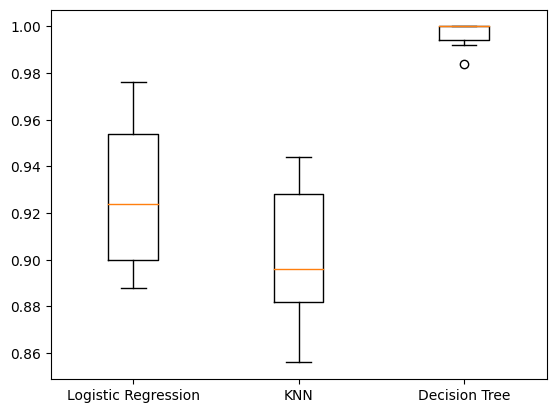

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

music = pd.read_csv('music_clean.csv')

X = music.drop("genre", axis=1).values
y = music["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()


**Test set performance**

In [ ]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Test Set Accuracy: 1.0
